# LOGISTIC REGRESSION : BINARY CLASSIFICATION TASK
create by Khoirul Romadhny (POWERARE)

Logistik regression merupakan teknik dalam memprediksi hasil dari klasifikasi biner 

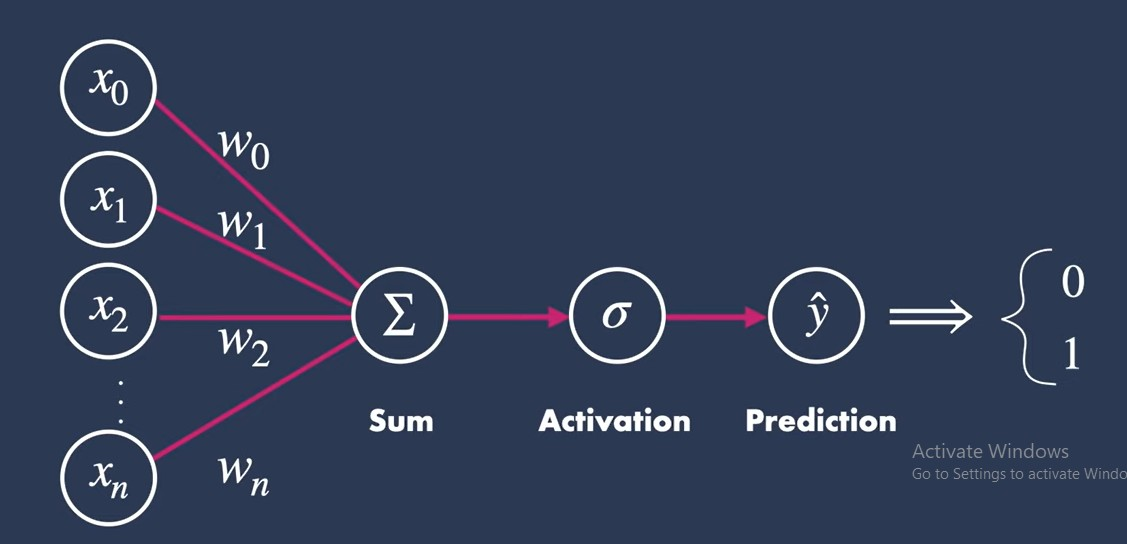

## FORMULA DASAR

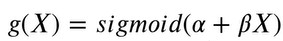

Pada persamaan diatas dapat dilihat bahwa logistic regression memiliki persamaan yang mirip dengan linear regression, hanya saja pada persamaan linearnya di masukkan pada sigmoid terlebih dahulu.

## SIGMOID

Fungsi sigmoid memiliki peran penting didalam logistik regresi. Disini sigmoid berperan sebagai activation function, sigmoid membutuhkan input berupa weight(bobot) dari fitur-fiturnya dan akan menghasilkan output berupa nilai probabilitas. 

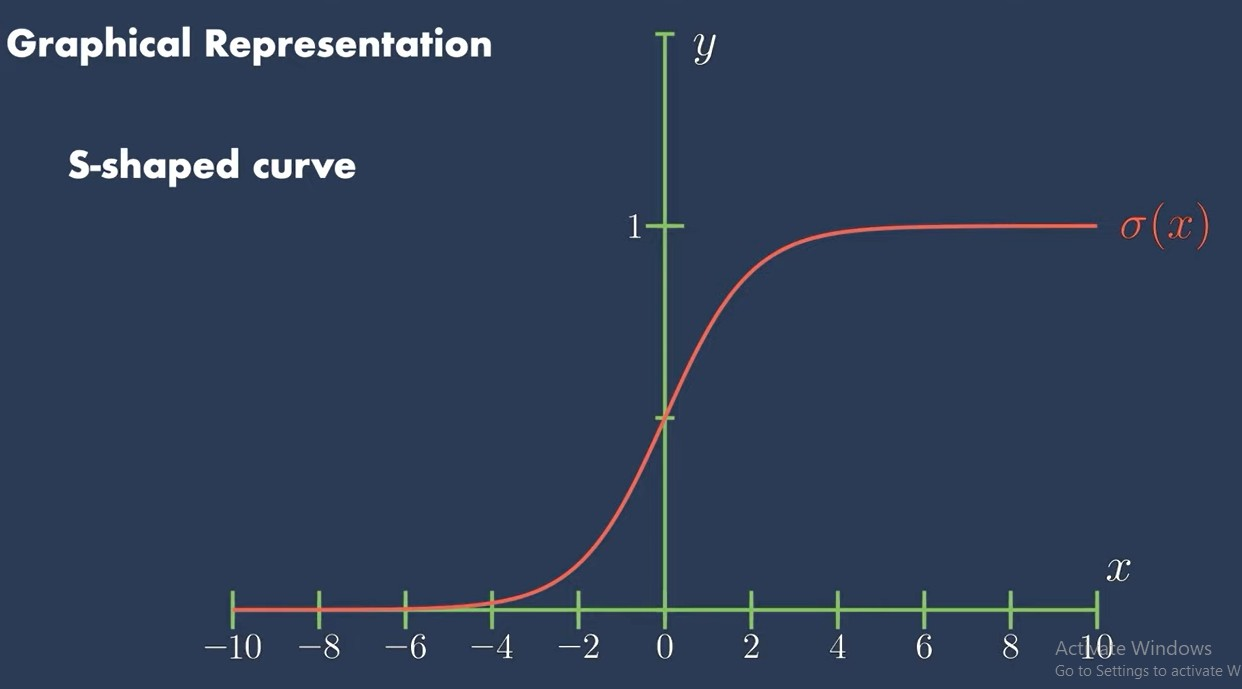

fungsi sigmoid memiliki curva berbentuk s dan nilai fungsi sigmoid akan selalu bernilai 0 - 1 atau pada curva yaitu nilai sumbu y pada nilai x (input) berapapun itu.

## FORMULA SIGMOID

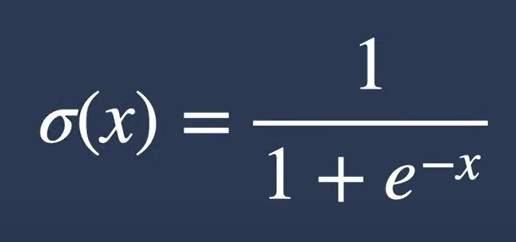

Pada persamaan diatas kita dapat melihat bahwa pada formula terdapat nilai e^(-x) yang merupakan invers dari fungsi eksponensial yang dimana jika kita bandingkan dalam bentuk grafik akan seperti berikut,

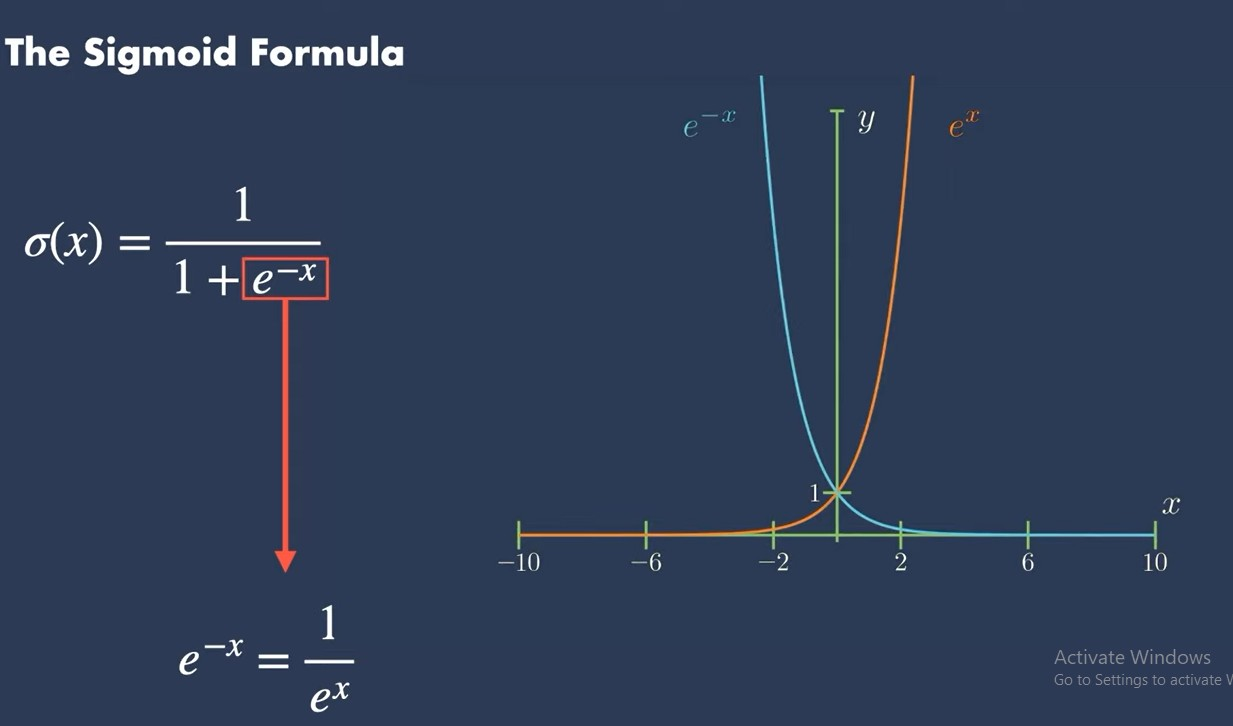

Untuk membuktikan bahwa hasil nilai fungsi sigmoid selalu bernilai 0-1 dimulai dengan mencari limit dari invers eksponensial yang ada pada sigmoid (e^(-x)) atau bisa juga dikatakan mencari asymtot dari curva tersebut.

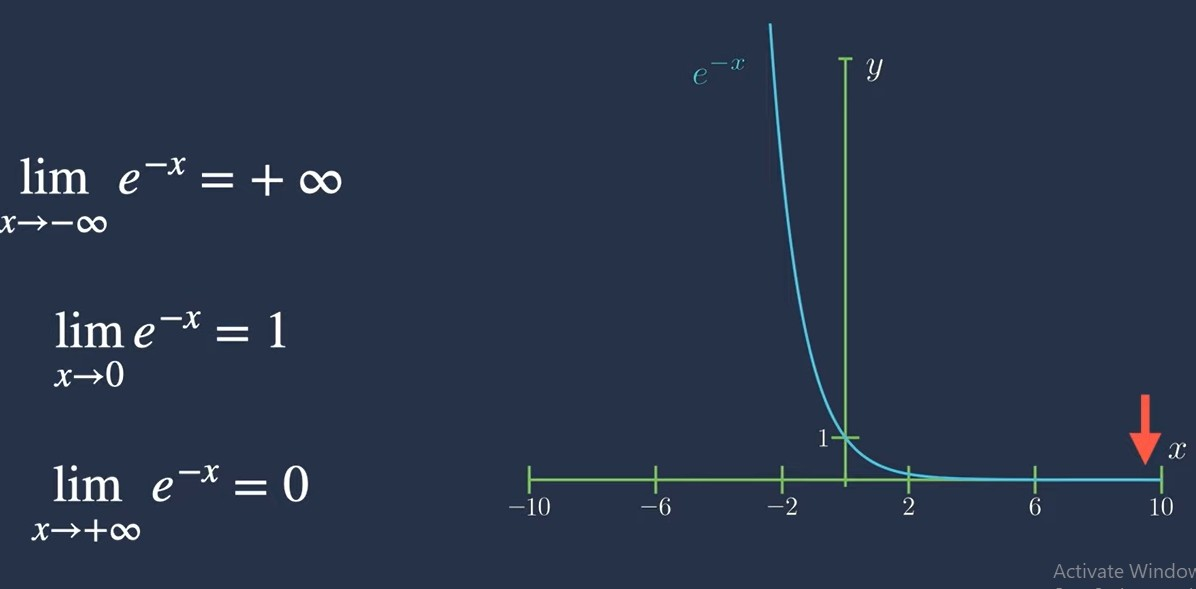

Selanjutnya kita dapat memasukkan setiap nilai limit yang didapatkan ke persamaan sigmoid,

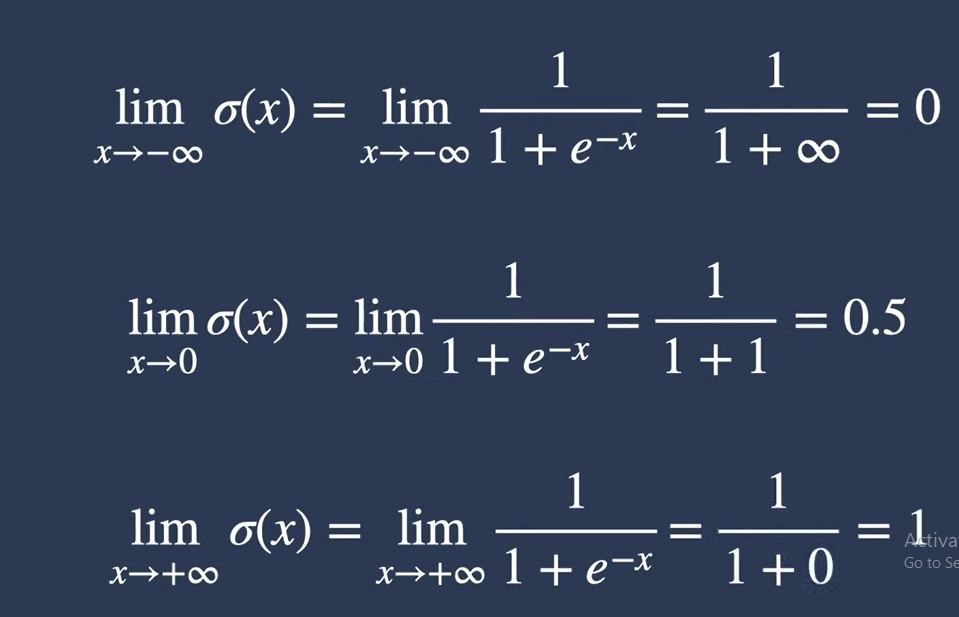

disini didapatkan nilai batas (asymtot) bernilai 0 dan 1 dan sekaligus membuktikan bahwa berapapun nilai x akan menghasilkan nilai sigmoid 0-1 dan ketika x = 0 maka curva akan berpotongan dengan sumbu y di y = 0.5

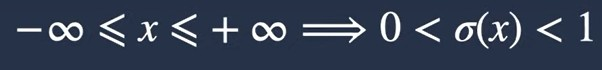

## PENGAPLIKASIAN SIGMOID PADA BINARY CLASSIFICATION

Ketika kita menentukan binary classification prediction maka dapat kita representasikan sebagai berikut,

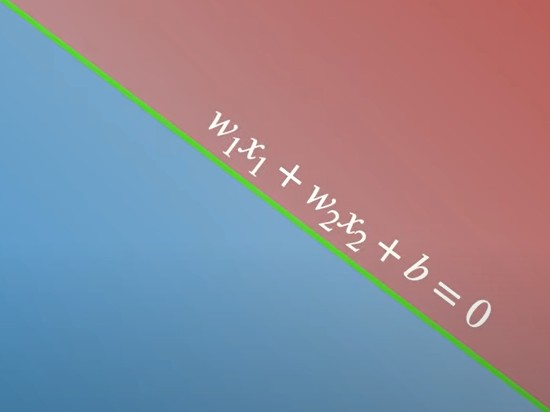

Jika kita ingin mengetahui probabilitas di titik manapun di gambar diatas maka kita harus menerapkan sigmoid.

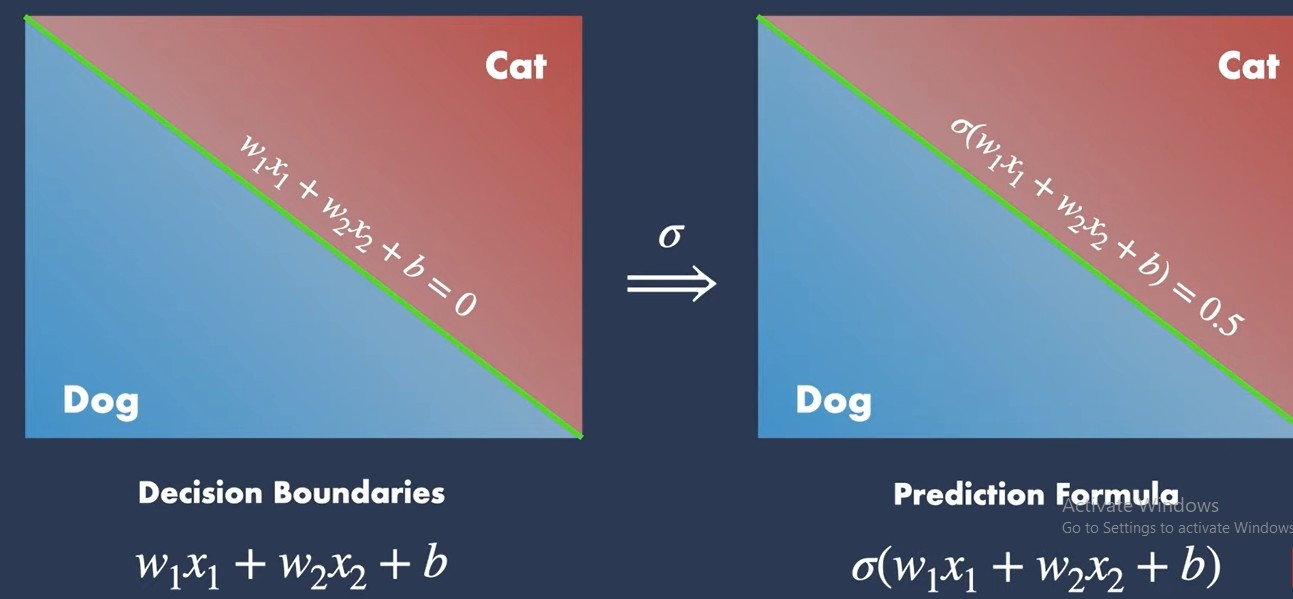

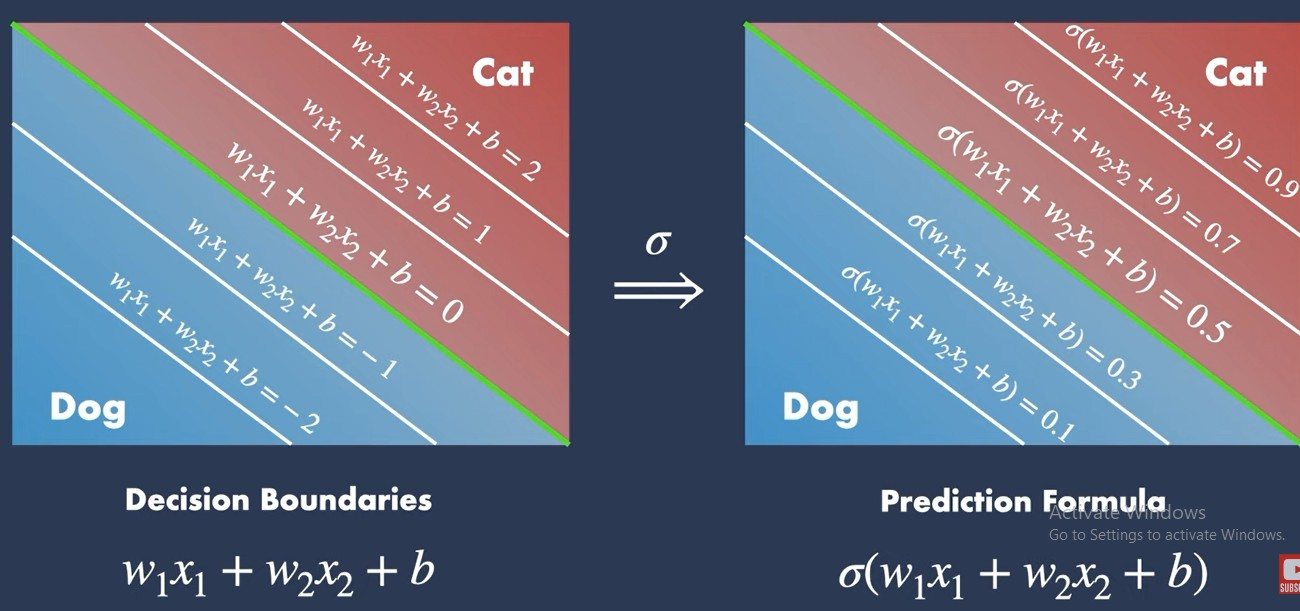

## DATASET : SMS SPAM COLLECTION 

In [1]:
import pandas as pd

df = pd.read_csv('SMSSpamCollection', #download file di https://archive.ics.uci.edu/ml/machine-learning-databases/00228/ lalu letakkan dokumen satu file dengan jupyter notebook yang dijalankan
                 sep = '\t',
                 header = None,
                 names = ['label', 'sms']
                )

df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

## TRAINING & TESTING DATASET

In [3]:
from sklearn.preprocessing import LabelBinarizer

X = df['sms']
y = df['label']

lb = LabelBinarizer()
y = lb.fit_transform(y).flatten()
print(y)
print(lb.classes_)

[0 0 1 ... 0 0 0]
['ham' 'spam']


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 0
                                                   )

print(X_train,'\n')
print(y_train)

872     Its going good...no problem..but still need li...
831     U have a secret admirer. REVEAL who thinks U R...
1273                                                Ok...
3314    Huh... Hyde park not in mel ah, opps, got conf...
4929    Just hopeing that wasn‘t too pissed up to reme...
                              ...                        
4931    Hi, the SEXYCHAT girls are waiting for you to ...
3264                              So u gonna get deus ex?
1653    For ur chance to win a £250 cash every wk TXT:...
2607    R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO ...
2732    Mm feeling sleepy. today itself i shall get th...
Name: sms, Length: 4179, dtype: object 

[0 1 0 ... 1 0 0]


## FEATURE EXTRACTION TF-IDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words = 'english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

print(X_train_vectorized)

  (0, 6903)	0.3591386422223876
  (0, 2006)	0.2898082580285881
  (0, 900)	0.4114867709157148
  (0, 6739)	0.3546359942830148
  (0, 2554)	0.3825278811525034
  (0, 3926)	0.3126721340000456
  (0, 4453)	0.2297719954323795
  (0, 5123)	0.308974289326673
  (0, 3007)	0.21421364306658514
  (0, 2997)	0.23173982975834367
  (1, 36)	0.28902673040368515
  (1, 1548)	0.18167737976542422
  (1, 2003)	0.2711077935907125
  (1, 5301)	0.2711077935907125
  (1, 4358)	0.17341410292348694
  (1, 532)	0.20186022353306565
  (1, 6131)	0.16142609035094446
  (1, 5394)	0.16464655071448758
  (1, 4677)	0.24039776602646504
  (1, 216)	0.28902673040368515
  (1, 6013)	0.20089911182610476
  (1, 6472)	0.24039776602646504
  (1, 5441)	0.5009783758205715
  (1, 799)	0.25048918791028574
  (1, 5642)	0.24344998442301355
  :	:
  (4176, 343)	0.2811068572055718
  (4176, 107)	0.29968668460649284
  (4176, 2004)	0.25589560236817055
  (4176, 4350)	0.29968668460649284
  (4176, 637)	0.29968668460649284
  (4176, 7114)	0.4512018097459442
  (4176

## BINARY CLASSIFICATION DENGAN LOGISTIC REGRESSION

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
y_pred = model.predict(X_test_vectorized)

for pred, sms in zip(y_pred[:5], X_test[:5]):
    print(f'Prdiction: {pred} - SMS: {sms}\n')

Prdiction: 0 - SMS: Storming msg: Wen u lift d phne, u say "HELLO" Do u knw wt is d real meaning of HELLO?? . . . It's d name of a girl..! . . . Yes.. And u knw who is dat girl?? "Margaret Hello" She is d girlfrnd f Grahmbell who invnted telphone... . . . . Moral:One can 4get d name of a person, bt not his girlfrnd... G o o d n i g h t . . .@

Prdiction: 0 - SMS: <Forwarded from 448712404000>Please CALL 08712404000 immediately as there is an urgent message waiting for you.

Prdiction: 0 - SMS: And also I've sorta blown him off a couple times recently so id rather not text him out of the blue looking for weed

Prdiction: 0 - SMS: Sir Goodmorning, Once free call me.

Prdiction: 0 - SMS: All will come alive.better correct any good looking figure there itself..



## EVALUATION METRICS PADA BINARY CLASSIFICATION

<ul>
    <li>Confunsion Matrix</li>
    <li>Accuracy</li>
    <li>Precision and Recall</li>
    <li>F1 Score</li>
    <li>ROC</li>
</ul>

### TERMINOLOGI DASAR

<ul>
    <li>True Positive (TP)</li>
    <li>True Negative (TN)</li>
    <li>False Positive (FP)</li>
    <li>False Negative (FN)</li>
</ul>

 ## CONFUSION MATRIX

Confusion matrix seringkali juga dikenal sebagai error matrix

In [10]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
matrix

array([[1207,    1],
       [  48,  137]], dtype=int64)

In [19]:
tn, fp, fn, tp = matrix.flatten()

print(f'TP : {tp}')
print(f'TN : {tn}')
print(f'FP : {fp}')
print(f'FN : {fn}')

TP : 137
TN : 1207
FP : 1
FN : 48


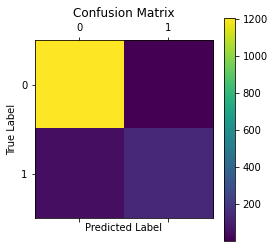

In [16]:
import matplotlib.pyplot as plt

plt.matshow(matrix)
plt.colorbar()

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### ACCURACY

Mengukur hasil prediksi yang benar dari semua data yang diujikan

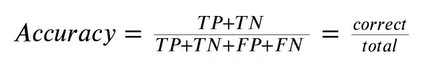

In [20]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Akurasi = {acc}')

Akurasi = 0.964824120603015


### PRECISION ATAU POSITIVE PREDICTIVE VALUE (PPV)

Mengukur ketepatan data yang benar terhadap data yang memang benar dan yang sebenarnya salah tetapi terprediksi benar. 

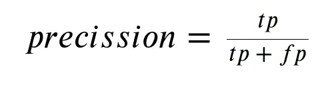

In [23]:
from sklearn.metrics import precision_score

pre = precision_score(y_test, y_pred)

print(f'Presisi = {pre}')

Presisi = 0.9927536231884058


### RECALL ATAU TRUE POSITIVE RATE (TPR) ATAU SENSITIFITAS

Mengukur sensitifitas suatu model training dengan membandingkan data yang benar terhadap data yang memang benar dan yang sebenarnya benar tetapi diprediksi salah.

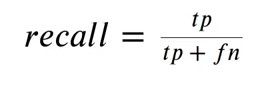

In [25]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall = {rec}')

Recall = 0.7405405405405405


### F1-SCORE

Merupakan nilai rata-rata harmonik dari precission dan recall

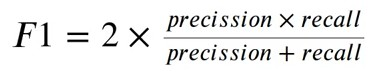

In [27]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1-Score = {f1}')

F1-Score = 0.8482972136222909


### ROC: RECEIVER OPERATING CHARACTERISTIC

ROC menawarkan visualisasi performa dari classifier dengan membandingkan nilai Recall (TPR) dan nilai Fallout (FPR)

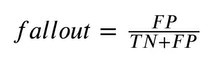

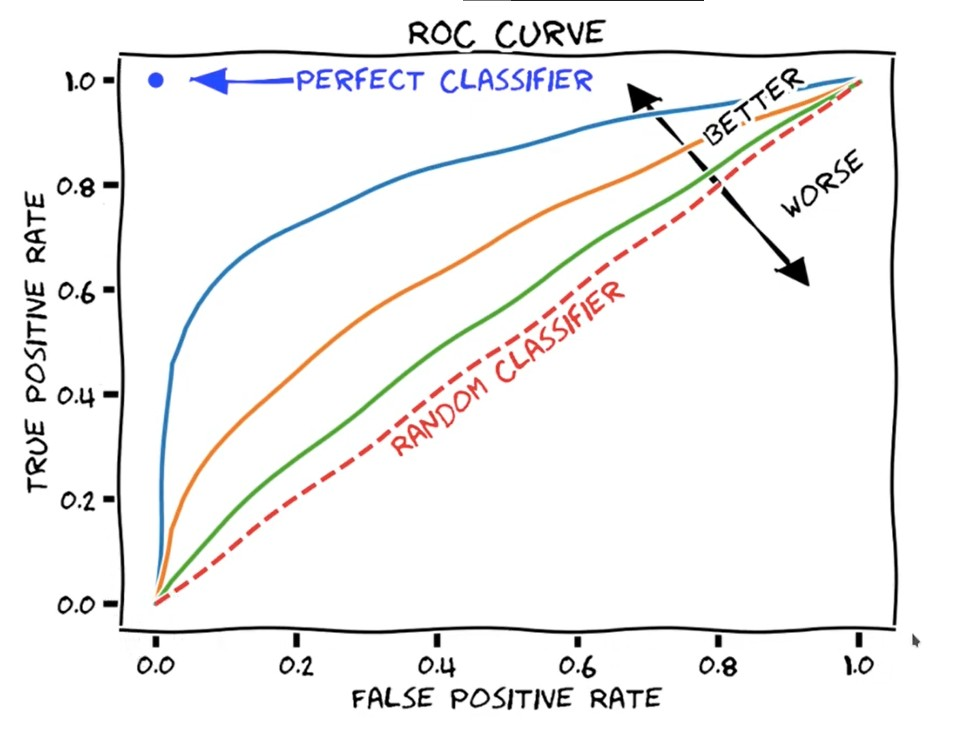

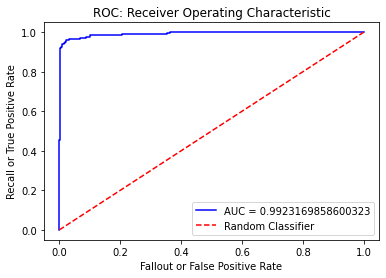

In [29]:
from sklearn.metrics import roc_curve, auc

prob_estimates = model.predict_proba(X_test_vectorized)

fpr, tpr, threshold = roc_curve(y_test, prob_estimates[:, 1])
nilai_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = f'AUC = {nilai_auc}')
plt.plot([0, 1], [0, 1], 'r--', label = 'Random Classifier')

plt.title('ROC: Receiver Operating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recall or True Positive Rate')
plt.legend()
plt.show()